In [ ]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials
from array import array
import os
from PIL import Image
import sys
import time
import os
import matplotlib.pyplot as plt

os.environ["VISION_KEY"] ="key"
os.environ["VISION_ENDPOINT"] ="api"
subscription_key = os.environ["VISION_KEY"]
endpoint = os.environ["VISION_ENDPOINT"]
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))

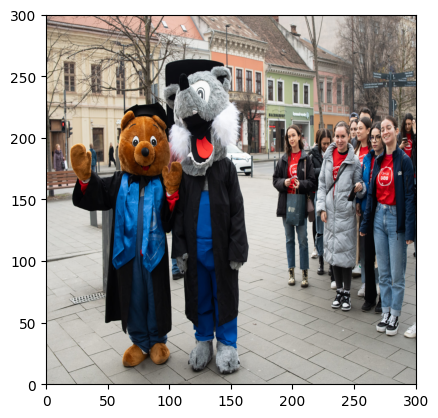

In [11]:
im = plt.imread("images/people.jpg")
fig, ax = plt.subplots()
im = ax.imshow(im, extent=[0, 300, 0, 300])
plt.show()

In [12]:
img = open("images/people.jpg", "rb")
result = computervision_client.analyze_image_in_stream(img, visual_features=[VisualFeatureTypes.tags, VisualFeatureTypes.objects])
print("tags ")
for tag in result.tags:
    print(tag)
    if (tag.name == "people") or (tag.name == "person") or (tag.name == "human") or (tag.name == "man"):
        print("People detected: ", tag.confidence)
print("objects ")
for ob in result.objects:
    print(ob.object_property, ob.rectangle)

tags 
{'additional_properties': {}, 'name': 'clothing', 'confidence': 0.9918707013130188, 'hint': None}
{'additional_properties': {}, 'name': 'footwear', 'confidence': 0.9892106652259827, 'hint': None}
{'additional_properties': {}, 'name': 'person', 'confidence': 0.9828459024429321, 'hint': None}
People detected:  0.9828459024429321
{'additional_properties': {}, 'name': 'outdoor', 'confidence': 0.9756385087966919, 'hint': None}
{'additional_properties': {}, 'name': 'jeans', 'confidence': 0.9706963896751404, 'hint': None}
{'additional_properties': {}, 'name': 'mascot', 'confidence': 0.9627652764320374, 'hint': None}
{'additional_properties': {}, 'name': 'building', 'confidence': 0.9578976035118103, 'hint': None}
{'additional_properties': {}, 'name': 'jacket', 'confidence': 0.9482133388519287, 'hint': None}
{'additional_properties': {}, 'name': 'smile', 'confidence': 0.9180234670639038, 'hint': None}
{'additional_properties': {}, 'name': 'man', 'confidence': 0.9173218011856079, 'hint': N

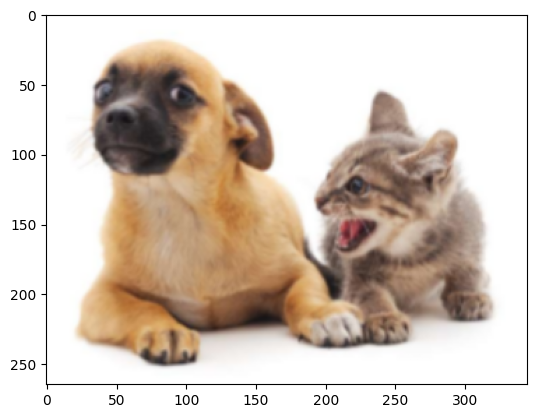

In [13]:
# plot the image
im = plt.imread("images/animals.png")
# fig, ax = plt.subplots()
# im = ax.imshow(im, extent=[0, 300, 0, 300])
# plt.show()
fig = plt.imshow(im)
plt.show()

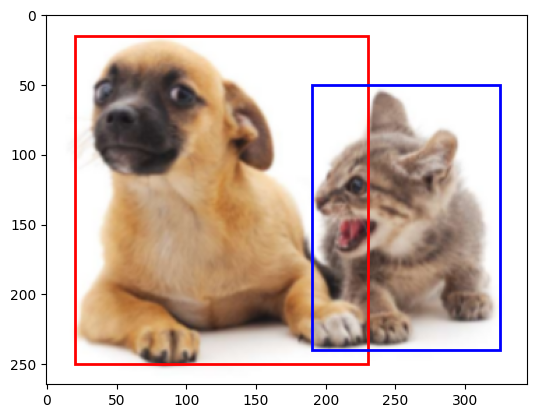

In [14]:
# add manually some bounding boxes for each object
dog_bb = [20.0, 15.0, 230, 250.0]
cat_bb = [190.0, 50.0, 325.0, 240.0]
im = plt.imread("images/animals.png")
fig = plt.imshow(im)
fig.axes.add_patch(plt.Rectangle(xy = (dog_bb[0], dog_bb[1]), width = dog_bb[2]-dog_bb[0], height = dog_bb[3]-dog_bb[1], fill = False, color = "red", linewidth = 2))
fig.axes.add_patch(plt.Rectangle(xy = (cat_bb[0], cat_bb[1]), width = cat_bb[2]-cat_bb[0], height = cat_bb[3]-cat_bb[1], fill = False, color = "blue", linewidth = 2))
plt.show()

detection error:  10.5


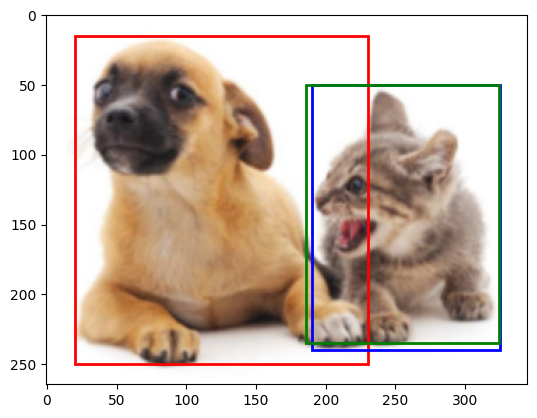

In [15]:
# automatically identify the object location
img = open("images/animals.png", "rb")
result = computervision_client.analyze_image_in_stream(img, visual_features=[VisualFeatureTypes.objects])
for ob in result.objects:
    if (ob.object_property == "cat"):
        predicted_cat_bb = [ob.rectangle.x, ob.rectangle.y, ob.rectangle.x + ob.rectangle.w, ob.rectangle.y + ob.rectangle.h]

# compute the error of detection (differneces between the real location and the predicted location)
err = 0
for v in zip(predicted_cat_bb, cat_bb):
    err = err + (v[0] - v[1])**2
err /= 4
print("detection error: ", err)

# show these differences on the image
im = plt.imread("images/animals.png")
fig = plt.imshow(im)
fig.axes.add_patch(plt.Rectangle(xy = (dog_bb[0], dog_bb[1]), width = dog_bb[2]-dog_bb[0], height = dog_bb[3]-dog_bb[1], fill = False, color = "red", linewidth = 2))
fig.axes.add_patch(plt.Rectangle(xy = (cat_bb[0], cat_bb[1]), width = cat_bb[2]-cat_bb[0], height = cat_bb[3]-cat_bb[1], fill = False, color = "blue", linewidth = 2))
fig.axes.add_patch(plt.Rectangle(xy = (predicted_cat_bb[0], predicted_cat_bb[1]), width = predicted_cat_bb[2]-predicted_cat_bb[0], height = predicted_cat_bb[3]-predicted_cat_bb[1], fill = False, color = "green", linewidth = 2))

plt.show()